# [조별실습] Python을 활용한 AI 모델링 - 딥러닝 파트
+ 이번 시간에는 Python을 활용한 AI 모델링에서 딥러닝에 대해 실습해 보겠습니다.
+ 딥러닝은 언어 번역, 고객 상담, 자율주행, 질병 진단 등 활용 분야가 지속 확장되고 있습니다.
+ 여기서는 딥러닝 모델 DNN(Deep Neural Network)에 대해 코딩하여 모델을 구축해 보겠습니다.
+ DNN은 입력 데이터를 수신하는 입력층과 여러 개의 은닉층, 그리고 모델의 출력이 나오는 출력층으로 구성이 되는데요!
+ Associate에서는 1)데이터 불러오기 및 확인-2)전처리(결측치처리, 데이터 인코딩, 데이터세트 분리, 데이터 스케일링)-3)모델 생성-
+ 4)모델 컴파일 - 5)모델 학습 및 성능평가 의 순서대로 딥러닝 파트가 출제가 됩니다.
+ 머신러닝과 딥러닝은 각 20점으로 배점 비중이 매우 크므로 15점짜리 문항은 꼭 챙기시기 바랍니다.
+ 모델링 프로세스에 따라 반복적으로 연습해보시고, 이탈자/미이탈자 그룹의 특성과 이탈방지 방안도 토론해보세요.
+ <span style="background-color:#fff6b1">**[문제]라고 표기된 부분이 실제 점수가 반영되는 시험문제라고 생각하고 더 신경써서 수행해주세요!**
+ ##### <font color=red>실습을 모두 수행하신 조원들은 AICE 자격검정의 노하우를 서로 공유해주세요.</font>

##  <span style="background-color:#fff5b1">학습목차
 딥러닝 심층신경망(DNN) 모델 프로세스
 - 데이터 가져오기
 - 데이터 전처리
 - Train, Test 데이터셋 분할
 - 데이터 정규화
 - DNN 딥러닝 모델

## <span style="background-color:#fff5b1"> [미션] 딥러닝 모델 프로세스 따라가기
## <span style="background-color:#fff5b1"> [미션] 이탈자/미이탈자 그룹의 특징과 이탈 방지 방안 공유하기
# 1. 딥러닝 심층신경망(DNN) 모델 프로세스
① 라이브러리 임포트(import)  
② 데이터 가져오기(Loading the data)  
③ 탐색적 데이터 분석(Exploratory Data Analysis)  
④ 데이터 전처리(Data PreProcessing) : 데이터타입 변환, Null 데이터 처리, 누락데이터 처리, 
더미특성 생성, 특성 추출 (feature engineering) 등  
⑤ Train, Test  데이터셋 분할  
⑥ 데이터 정규화(Normalizing the Data)  
⑦ 모델 개발(Creating the Model)  
⑧ 모델 성능 평가

## ① 라이브러리 임포트

##### 필요 라이브러리 임포트

In [2]:
# NumPy, Pandas 및 Matplotlib 라이브러리를 가져오세요.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## ② 데이터 로드

#### <font color=blue> **[문제1] 같은 폴더내에 있는 data_v1_save.csv 파일을 Pandas read_csv 함수를 이용하여 읽어 df 변수에 저장하세요.** </font>

In [3]:
# 읽어 들일 파일명 : data_v1_save.csv
# Pandas read_csv 함수 활용
# 결과 : df 저장
df = pd.read_csv('data_v1_save.csv')


## ③ 데이터 분석

In [4]:
# info 함수 활용, 데이터 구성 확인
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7027 non-null   object 
 1   Partner           7027 non-null   object 
 2   Dependents        7027 non-null   object 
 3   tenure            7027 non-null   int64  
 4   MultipleLines     7027 non-null   object 
 5   InternetService   7027 non-null   object 
 6   OnlineSecurity    7027 non-null   object 
 7   OnlineBackup      7027 non-null   object 
 8   TechSupport       7027 non-null   object 
 9   StreamingTV       7027 non-null   object 
 10  StreamingMovies   7027 non-null   object 
 11  Contract          7027 non-null   object 
 12  PaperlessBilling  7027 non-null   object 
 13  PaymentMethod     7027 non-null   object 
 14  MonthlyCharges    7027 non-null   float64
 15  TotalCharges      7027 non-null   float64
 16  Churn             7027 non-null   int64  


In [5]:
# tail 함수 활용, 데이터 구성 확인
df.tail()


,gender,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7022,Female,No,No,72,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0
7023,Male,Yes,Yes,24,Yes,DSL,Yes,No,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7024,Female,Yes,Yes,72,Yes,Fiber optic,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7025,Female,Yes,Yes,11,No phone service,DSL,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7026,Male,Yes,No,4,Yes,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


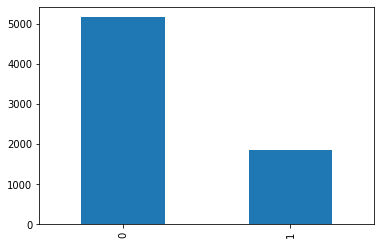

In [11]:
# Churn 레이블이 불균형한지 bar 그래프로 분포를 표시

df['Churn'].value_counts().plot(kind = 'bar')
plt.show()

## ④ 데이터 전처리

+ 모든 데이터값들은 숫자형으로 되어야 합니다. 즉, Ojbect 타입을 모두 숫자형으로 변경 필요
+ object 컬럼에 대해 Pandas get_dummies 함수 활용, One-Hot-Encoding

In [14]:
# object 타입의 컬럼명 수집, 'cal_cols' 변수로 저장
cal_cols = df.select_dtypes('object').columns


#### <font color=blue> **[문제2] object 컬럼에 대해 One-Hot-Encoding을 수행하고 그 결과를 df1 변수에 저장하세요.** </font>

In [17]:
# Pandas get_dummies() 함수 이용
# 원-핫-인코딩 결과를 df1 저장
#df1 = df.copy()
df1 = pd.get_dummies(df, columns = cal_cols)

In [18]:
# info 함수 활용, df1 데이터 구성 확인
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7027 non-null   int64  
 1   MonthlyCharges                           7027 non-null   float64
 2   TotalCharges                             7027 non-null   float64
 3   Churn                                    7027 non-null   int64  
 4   gender_Female                            7027 non-null   uint8  
 5   gender_Male                              7027 non-null   uint8  
 6   Partner_No                               7027 non-null   uint8  
 7   Partner_Yes                              7027 non-null   uint8  
 8   Dependents_No                            7027 non-null   uint8  
 9   Dependents_Yes                           7027 non-null   uint8  
 10  MultipleLines_No                         7027 no

## ⑤ Train, Test  데이터셋 분할

In [21]:
# scikit-learn 라이브러리의 train_test_split 함수 임포트하기
from sklearn.model_selection import train_test_split


In [22]:
# 'Churn' 열을 제거하고 나머지 열만을 사용하여 X 변수에 할당
# 'Churn' 열만을 선택하여 y 변수에 할당
X = df1.drop('Churn', axis=1)
y = df1['Churn']

In [23]:
# 입력 : X, y 
# Train : Test 비율 = 7:3
# y Class 비율을 유지하면서 나누기 : stratify=y
# 여러 번 수행해도 같은 결과 나오게 고정 : random_state=42 
# 결과 : X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)


In [24]:
# X_train, X_test 배열의 형태 확인

X_train.shape

(4918, 39)

In [25]:
# y_train 배열의 형태 확인

y_train.shape

(4918,)

## ⑥ 데이터 정규화/스케일링(Normalizing/Scaling)

In [26]:
# tail 함수 활용, df1 컬럼 분포 확인
# 숫자 분포 이루어진 컬럼 확인
df1.tail()


,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
7022,72,21.15,1419.40,0,1,0,1,0,1,0,...,0,0,0,1,0,1,1,0,0,0
7023,24,84.80,1990.50,0,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7024,72,103.20,7362.90,0,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7025,11,29.60,346.45,0,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7026,4,74.40,306.60,1,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [27]:
# scikit-learn 라이브러리에서 MinMaxScaler 클래스 가져오기
from sklearn.preprocessing import MinMaxScaler


In [28]:
# MinMaxScaler 함수를 'scaler'로 정의 하세요.
# 정의할 결과를 'scaler'로 매핑, MinMaxScaler 객체를 scaler로 생성
# 훈련 데이터에 fit 메서드 적용, transform 메서드로 데이터 변환
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# X_train 배열의 첫 두 행 반환
# 훈련데이터의 일부 미리보기
X_train[:2]


array([[0.65277778, 0.56851021, 0.40877722, 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.27777778, 0.00498256, 0.04008671, 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1. 

## ⑦ 딥러닝 심층신경망(DNN) 모델 구현

####  
### 라이브러리 임포트

In [31]:
# 아래 라이브러리를 임포트하시오

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

tf.random.set_seed(100)

####  
### 하이퍼파라미터 설정 : batch_size, epochs

In [32]:
# 아래와 같이 하이퍼파라미터를 설정하시오.

batch_size = 16
epochs = 20

####  
### 모델 입력(features) 갯수 확인

In [33]:
# X_train 배열 형태(shape) 반환
X_train.shape


(4918, 39)

####  
### 모델 출력(label) 갯수 확인

In [34]:
# y_train 배열의 형태(shape) 반환
y_train.shape


(4918,)

####  
### **A. 이진분류 DNN모델 구성**
#### 이진분류를 위한 DNN 모델은 컴퓨터가 두 가지 중 하나를 선택하는 문제를 해결하기 위해 사용 (Ex.이메일이 스팸인지 아닌지)
#### **ㅇ주요 구성요소**
##### -입력 레이어 : 데이터의 특성(예: 이메일의 단어) 받기
##### -은닉 레이어 : 중간 단계의 계산, 복잡한 패턴 학습
##### -출력 레이어 : 최종 결정, 주로 "예" 또는 "아니오"를 결정
#### **ㅇ활성화 함수**
##### -ReLU : 은닉 레이어에서 주로 사용되며, 음수는 0으로 만든다.
##### -시그모이드 : 출력 레이어에서 사용되며, 결과를 0과 1 사이로 만든다.
#### **ㅇ손실 함수와 옵티마이저**
##### -손실 함수 : 모델의 예측이 얼마나 틀렸는지 측정, 이진 분류에서는 주로 "binary_crossentropy" 사용
##### -옵티마이저 : 손실을 줄이기 위해 파라미터를 업데이트하는 방법을 결정, "Adam"과 같은 알고리즘 사용


![hidden Layer](https://github.com/gzone2000/TEMP_TEST/raw/master/hidden_layer1.PNG)
+ [출처] https://subscription.packtpub.com/book/data/9781788995207/1/ch01lvl1sec03/deep-learning-intuition

#### <font color=blue> **[문제3] 아래 요구사항대로 프로세스에 따라 Sequential 모델을 만들어 보세요.** </font>

In [37]:
# Sequential() 모델 정의, model로 저장
# input layer는 input_shape=(39,) 옵션 사용
# 39개 input layer : relu 사용
# unit 4개 hidden layer : relu 사용
# unit 3개 hidden layer : relu 사용
# 1개 output layser : sigmoid 사용

model = Sequential([Dense(4, input_shape = (39,), activation = 'relu'),
                    Dense(3, activation = 'relu'),
                    Dense(1, activation = 'sigmoid')])



####  
### 모델 확인

In [38]:
# Keras 모델 구조를 요약하여 출력
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 160       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 179
Trainable params: 179
Non-trainable params: 0
_________________________________________________________________


####  
### Sequential 모델 정의

In [39]:
# Sequential() 모델 정의 하고 model로 저장
model = Sequential()


####  
### 모델 구성 -  과적합 방지

![dropout](https://github.com/gzone2000/TEMP_TEST/raw/master/dropout.PNG)
+ [출처] https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5

In [40]:
# 아래와 같이 Sequential 모델을 생성하고 각 레이어를 추가해주세요. model.add() 사용

# input layer: 39개의 입력 노드와 활성화 함수로 'relu' 사용
model.add(Dense(4, input_shape = (39,), activation = 'relu'))

# 첫 번째 hidden layer 후에 Dropout 레이어 추가: Dropout 비율 0.3
model.add(Dropout(0.3))

# 두 번째 hidden layer: 3개의 노드와 활성화 함수로 'relu' 사용
model.add(Dense(3, activation = 'relu'))

# 두 번째 hidden layer 후에 Dropout 레이어 추가: Dropout 비율 0.3
model.add(Dropout(0.3))

# output layer: 이진 분류를 위한 1개의 노드와 활성화 함수 sigmoid 사용
model.add(Dense(1, activation = 'sigmoid'))

####  
### 과적합 방지 모델 확인

In [41]:
# 모델 구조와 각 레이어 세부 정보 출력
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 160       
_________________________________________________________________
dropout (Dropout)            (None, 4)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 15        
_________________________________________________________________
dropout_1 (Dropout)          (None, 3)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 179
Trainable params: 179
Non-trainable params: 0
_________________________________________________________________


####  
### 모델 컴파일 – 이진 분류 모델

#### <font color=blue> **[문제4] 아래 요구사항대로 이진 분류 모델을 컴파일해주세요.** </font>

In [42]:
# - 옵티마이저 : 'adam'
# - 손실 함수 : 'binary_crossentropy'
# - 평가 지표 : 'accuracy'
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


- 모델 컴파일 – 이진 분류 모델 <br>
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

- 모델 컴파일 – 다중 분류 모델 (Y값을 One-Hot-Encoding 한 경우) <br>
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

- 모델 컴파일 – 다중 분류 모델  (Y값을 One-Hot-Encoding 하지 않은 경우) <br>
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

- 모델 컴파일 – 예측 모델
model.compile(optimizer='adam', loss='mse')

####  
### 모델 학습

+ 모델 이름 : model
+ Sequential 모델의 fit() 함수 사용
+ X, y : X_train, y_train
+ validation_data=(X_test, y_test)
+ epochs : 10번
+ batch_size : 10번

#### <font color=blue> **[문제5] 위의 요구사항대로 DNN 모델을 학습시키세요.** </font>

In [43]:
# model.fit()
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 10)




Epoch 1/10
492/492 [==============================] - 2s 2ms/step - loss: 0.6370 - accuracy: 0.7220 - val_loss: 0.5247 - val_accuracy: 0.7345
Epoch 2/10
492/492 [==============================] - 1s 2ms/step - loss: 0.5534 - accuracy: 0.7330 - val_loss: 0.4802 - val_accuracy: 0.7345
Epoch 3/10
492/492 [==============================] - 1s 1ms/step - loss: 0.5273 - accuracy: 0.7535 - val_loss: 0.4734 - val_accuracy: 0.7345
Epoch 4/10
492/492 [==============================] - 1s 1ms/step - loss: 0.5259 - accuracy: 0.7592 - val_loss: 0.4646 - val_accuracy: 0.7364
Epoch 5/10
492/492 [==============================] - 1s 1ms/step - loss: 0.5138 - accuracy: 0.7602 - val_loss: 0.4651 - val_accuracy: 0.7368
Epoch 6/10
492/492 [==============================] - 1s 1ms/step - loss: 0.4953 - accuracy: 0.7728 - val_loss: 0.4550 - val_accuracy: 0.7653
Epoch 7/10
492/492 [==============================] - 1s 1ms/step - loss: 0.5085 - accuracy: 0.7543 - val_loss: 0.4532 - val_accuracy: 0.7496
Epoch 

####
### B. 다중분류 DNN 모델 구성
+ 입력레이어(input layer) : 18개, 네트워크에 데이터를 입력하는 역할
+ 은닉레이어 1(hidden layer) : 5개 unit, 활성화 함수는 보통 ReLU 등이 사용
+ 은닉레이어 2(hidden layer) : 4개 unit, 활성화 함수는 보통 ReLU 사용 
+ 출력레이어(Output Layer) : 2개, 활성화 함수는 보통 softmax 사용

![다중분류](https://github.com/gzone2000/TEMP_TEST/raw/master/hidden_layer2.PNG)
+ [출처] https://www.educba.com/dnn-neural-network/

#### <font color=blue> **[문제6] 아래 요구사항대로 프로세스에 따라 DNN 모델을 구성하세요.** </font>

In [44]:
# 39개 input layer, input_shape=(39,)
# unit 5개 hidden layer
# dropout 0.3
# unit 4개 hidden layer 
# dropout 0.3
# 2개 output layer : 다중분류, softmax 사용
# epochs : 20번
# batch_size : 16번
model = Sequential([Dense(4, input_shape = (39,), activation = 'relu'),
                    Dropout(0.3),
                    Dense(3, activation = 'relu'),
                    Dropout(0.3),
                    Dense(2, activation = 'softmax')])



####  
### 모델 확인

In [45]:
# 모델 구조와 각 레이어의 세부 정보 출력

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 160       
_________________________________________________________________
dropout_2 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 15        
_________________________________________________________________
dropout_3 (Dropout)          (None, 3)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 8         
Total params: 183
Trainable params: 183
Non-trainable params: 0
_________________________________________________________________


####  
### 모델 컴파일 – 다중 분류 모델

In [31]:
# y_train 배열의 형태 반환



In [46]:
# 모델을 컴파일 해주세요. 
# optimizer : 'adam', 손실함수 : 'sparse_categorical_crossentropy', 평가지표 : 'accuracy'

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

####  
### 모델 학습

#### <font color=blue> **[문제7] 아래 요구사항대로 모델을 학습시키세요.** </font>

In [47]:
# 학습데이터 : X_train, y_train
# 검증데이터 : X_test, y_test
# epochs : 20, batch_size : 16
# 'history' 변수에 저장

model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20, batch_size = 16)

Epoch 1/20
308/308 [==============================] - 1s 2ms/step - loss: 0.6508 - accuracy: 0.7035 - val_loss: 0.5122 - val_accuracy: 0.7345
Epoch 2/20
308/308 [==============================] - 0s 2ms/step - loss: 0.5474 - accuracy: 0.7422 - val_loss: 0.4914 - val_accuracy: 0.7354
Epoch 3/20
308/308 [==============================] - 0s 2ms/step - loss: 0.5359 - accuracy: 0.7364 - val_loss: 0.4767 - val_accuracy: 0.7359
Epoch 4/20
308/308 [==============================] - 0s 2ms/step - loss: 0.5252 - accuracy: 0.7417 - val_loss: 0.4652 - val_accuracy: 0.7435
Epoch 5/20
308/308 [==============================] - 0s 1ms/step - loss: 0.4948 - accuracy: 0.7606 - val_loss: 0.4552 - val_accuracy: 0.7553
Epoch 6/20
308/308 [==============================] - 0s 1ms/step - loss: 0.4905 - accuracy: 0.7774 - val_loss: 0.4549 - val_accuracy: 0.7658
Epoch 7/20
308/308 [==============================] - 0s 1ms/step - loss: 0.4995 - accuracy: 0.7645 - val_loss: 0.4501 - val_accuracy: 0.7601
Epoch 

####  
### Callback : 조기종료, 모델 저장

In [49]:
# EarlyStopping과 ModelCheckpoint Callback을 임포트

from tensorflow.keras.callbacks import EarlyStopping

In [50]:
# EarlyStopping Callback 설정
# val_loss(검증손실) 모니터링해서 손실이 최소화되는 방향으로 모니터링 (mode='min')
# 성능이 5번 지나도록 좋아지지 않으면 조기 종료 (patience=5)
es = EarlyStopping(monitor = 'val_loss', mode='min', patience=5)


In [36]:
# 최적의 모델을 'best_model.h5' 파일로 저장, 검증 손실이 최소일 때만 저장
# val_loss 가장 낮은 값을 가질 때마다 모델 저장



####  
### 모델 학습

#### <font color=blue> **[문제8] 주어진 훈련데이터(X_train, y_train)와 테스트데이터(X_test, y_test)에 대한 모델을 훈련시켜보세요.** </font>
#### <font color=blue> **아래 조건을 충족하는 코드를 작성하십시오.** </font>

In [59]:
# early_stop과 check_point Callback 사용하여 모델에 적용시키세요.
# epochs=50, batch_size=20
# 검증 데이터로 X_test, y_test 사용
# verbose 옵션을 1로 설정
# 'history' 변수에 저장

history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50, batch_size = 20, verbose = 1, callbacks = [es]).history



Epoch 1/50
246/246 [==============================] - 0s 2ms/step - loss: 0.4691 - accuracy: 0.7633 - val_loss: 0.4334 - val_accuracy: 0.7795
Epoch 2/50
246/246 [==============================] - 0s 2ms/step - loss: 0.4736 - accuracy: 0.7611 - val_loss: 0.4280 - val_accuracy: 0.7843
Epoch 3/50
246/246 [==============================] - 0s 2ms/step - loss: 0.4652 - accuracy: 0.7688 - val_loss: 0.4275 - val_accuracy: 0.7899
Epoch 4/50
246/246 [==============================] - 0s 1ms/step - loss: 0.4656 - accuracy: 0.7776 - val_loss: 0.4259 - val_accuracy: 0.7909
Epoch 5/50
246/246 [==============================] - 0s 1ms/step - loss: 0.4689 - accuracy: 0.7662 - val_loss: 0.4287 - val_accuracy: 0.7847
Epoch 6/50
246/246 [==============================] - 0s 1ms/step - loss: 0.4662 - accuracy: 0.7629 - val_loss: 0.4283 - val_accuracy: 0.7871
Epoch 7/50
246/246 [==============================] - 0s 1ms/step - loss: 0.4700 - accuracy: 0.7623 - val_loss: 0.4250 - val_accuracy: 0.7866
Epoch 

####  
## ⑧ 모델 성능 평가

In [60]:
# history 객체에서 훈련 과정의 손실값을 Pandas의 DataFrame으로 변환한 후 'losses' 변수에 저장

losses = pd.DataFrame(history['loss'])

In [61]:
# 'losses' 첫 5행 확인
losses.head(5)


,0
0,0.469101
1,0.473580
2,0.465175
3,0.465604
4,0.468857


### 성능 시각화

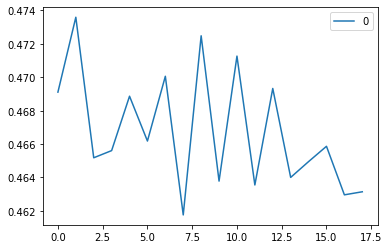

In [62]:
# 훈련과 검증 데이터에 대한 손실(loss, val_loss)을 그래프로 시각화하는 코드를 작성하세요.
# plot() 함수
losses.plot()
plt.show()

In [75]:
loss_table = pd.DataFrame(history, columns = ['loss', 'val_loss'])
acc_table = pd.DataFrame(history, columns = ['accuracy', 'val_accuracy'])

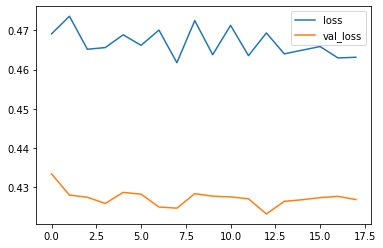

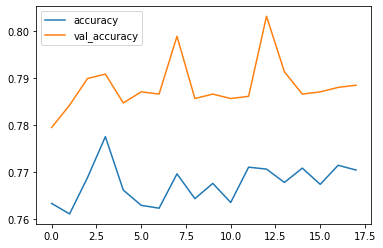

In [80]:
# 훈련 및 검증 데이터의 손실(loss, val_loss)과 정확도(accuracy, val_accuracy)를 그래프로 시각화하는 코드를 작성하세요.
loss_table.plot()
acc_table.plot()

plt.show()

#### <font color=blue> **[문제9] 아래 조건에 따라 훈련데이터와 검증데이터에 대한 정확도를 시각화하는 코드를 작성하세요** </font>

+ 'history' 객체를 사용
+ 그래프 제목 : 'Accuracy'
+ x축 레이블 : 'Epochs'
+ y축 레이블 : 'Acc'
+ 범례 : 'acc', 'val_acc'

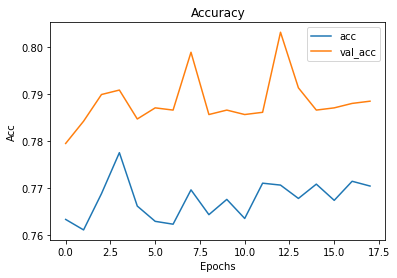

In [82]:
# 훈련 정확도 그리기 (accuracy)
plt.plot(history['accuracy'])

# 검증 정확도 그리기 (val_accuracy)
plt.plot(history['val_accuracy'])

# 그래프 제목 : Accuracy
plt.title('Accuracy')

# X축레이블 : Epochs
plt.xlabel('Epochs')

# y축레이블 : Acc
plt.ylabel('Acc')

# 범례 : acc, val_acc
plt.legend(['acc', 'val_acc'])

# 그래프 출력
plt.show()

### 성능 평가

In [83]:
# scikit-learn 라이브러리에서 모델 성능평가를 위한 정확도, 정밀도, 재현율, F1 점수 불러오기
# sklearn에서 제공하는 분류 리포트 불러오기
from sklearn.metrics import *


In [84]:
# 모델을 사용하여 X_test 데이터 예측값 계산하여 pred에 저장
pred = model.predict(X_test)


In [88]:
# pred 형태 확인
type(pred)

numpy.ndarray

In [89]:
# 'pred' 배열에서 각 행(axis=1) 최댓값의 인덱스를 찾아 'y_pred'에 저장
# np.argmax
y_pred = np.argmax(pred, axis=1)


In [90]:
# y_pred 확인
y_pred


array([0, 0, 0, ..., 1, 0, 0])

In [91]:
# y_test, y_pred 정확도 확인
accuracy_score(y_test, y_pred)


0.7885253674727359

In [92]:
# y_test, y_pred 재현율 확인
recall_score(y_test, y_pred)


0.32142857142857145

In [96]:
# accuracy, recall, precision 성능 한번에 보기
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1549
           1       0.73      0.32      0.45       560

    accuracy                           0.79      2109
   macro avg       0.76      0.64      0.66      2109
weighted avg       0.78      0.79      0.76      2109



##### (참고) 재현율 성능이 좋지 않다면 어떻게 성능향상 할 수 있나?
+ 성능향상을 할 수 있는 방법은 여러 가지가 있습니다. (시험범위는 아닙니다)
+ DNN 하이퍼파라미터를 수정하면서 성능향상이 되는지 확인해 볼 수 있습니다.
+ 데이터를 줄이거나(UnderSampling) 늘리거나(OverSampling), Feature(컬럼)을 늘리거나 줄이거나 하는 식으로 데이터를 균형하게 조정할 수도 있습니다.

###  
## <span style="background-color:#fff5b1"> 이제까지 딥러닝에서 수행한 내용을 한번 볼까요?
 딥러닝 심층신경망(DNN) 모델 프로세스
 + 데이터 가져오기
 + 데이터 전처리
 + Train, Test 데이터셋 분할
 + 데이터 정규화
 + DNN 딥러닝 모델

####
#### **조별실습-딥러닝 파트를 수행하시느라 고생 많으셨습니다^^**

#### **실습을 수행하신 분들은 이탈 방지 방안에 대해 토론해주시고 AICE 시험을 잘 보기 위한 노하우를 공유해주세요!**

#### **마무리하신 조는 전체 발표방으로 이동해주세요!**